In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
blas_f32 = pd.read_csv('grid_search_laplace_blas_f32_m1.csv')
blas_f64 = pd.read_csv('grid_search_laplace_blas_f64_m1.csv')
fft_f32 = pd.read_csv('grid_search_laplace_fft_f32_m1.csv')
fft_f64 = pd.read_csv('grid_search_laplace_fft_f64_m1.csv')

# Filter for random SVD
blas_f32 = blas_f32[blas_f32['n_oversamples'] > 0]
blas_f64 = blas_f64[blas_f64['n_oversamples'] > 0]

In [49]:
def min_digits(df, n, feature='mean_rel_err'):
    upper_bound = 10**-n
    lower_bound = 10**(-n-1)
    return df[(lower_bound <= df[feature]) & (df[feature] <= upper_bound)]

In [50]:
def fastest(df, feature='runtime'):
    min_index = df[feature].idxmin()
    return df.loc[min_index]

# Fastest settings for given accuracy

## Single precision

In [57]:
three_digits_blas_f32 = min_digits(blas_f32, 3)
four_digits_blas_f32 = min_digits(blas_f32, 4)
five_digits_blas_f32 = min_digits(blas_f32, 5)

three_digits_fft_f32 = min_digits(fft_f32, 3)
four_digits_fft_f32 = min_digits(fft_f32, 4)
five_digits_fft_f32 = min_digits(fft_f32, 5)

best_blas_f32 = [fastest(three_digits_blas_f32), fastest(four_digits_blas_f32), fastest(five_digits_blas_f32)]
best_fft_f32 = [fastest(three_digits_fft_f32), fastest(four_digits_fft_f32), fastest(five_digits_fft_f32)]

In [117]:
best_fft_f32[2]

depth                 5.000000
expansion_order       5.000000
block_size           32.000000
runtime             394.000000
min_rel_err           0.000000
mean_rel_err          0.000004
max_rel_err           0.000010
setup_time         1608.000000
Name: 31, dtype: float64

In [122]:
best_blas_f32[1]

depth                 5.000000
surface_diff          1.000000
svd_threshold         0.000100
expansion_order       3.000000
runtime             341.000000
min_rel_err           0.000003
mean_rel_err          0.000023
max_rel_err           0.000055
n_iter                0.000000
n_oversamples         5.000000
setup_time         1414.000000
Name: 324, dtype: float64

In [100]:
0.000010

1e-05

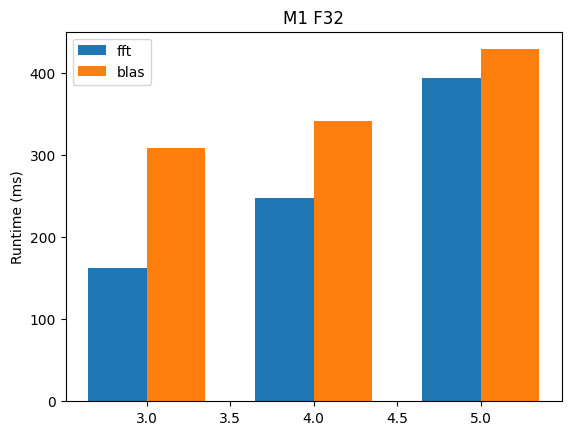

In [81]:
fig, ax = plt.subplots()

digits = np.array([3, 4, 5])

ax.set_title('M1 F32')
ax.set_ylabel('Runtime (ms)')

bar_width = 0.35  # width of bars

ax.bar(digits-bar_width/2, [df['runtime'] for df in best_fft_f32], bar_width, label='fft')
ax.bar(digits+bar_width/2, [df['runtime'] for df in best_blas_f32], bar_width, label='blas')

ax.legend()

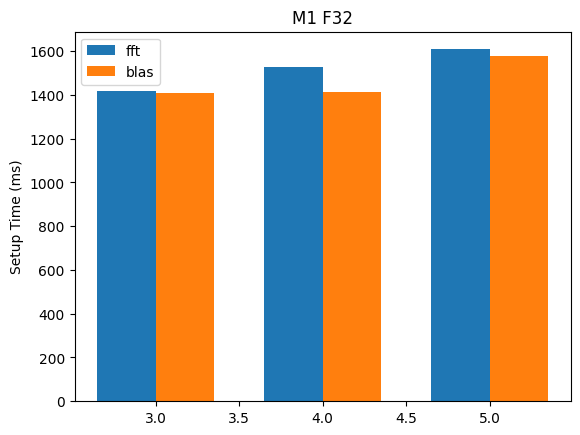

In [53]:
fig, ax = plt.subplots()

digits = np.array([3, 4, 5])

ax.set_title('M1 F32')
ax.set_ylabel('Setup Time (ms)')

bar_width = 0.35  # width of bars

ax.bar(digits-bar_width/2, [df['setup_time'] for df in best_fft_f32], bar_width, label='fft')
ax.bar(digits+bar_width/2, [df['setup_time'] for df in best_blas_f32], bar_width, label='blas')

ax.legend()

## Double Precision

In [86]:
six_digits_blas_f64 = min_digits(blas_f64, 6)
seven_digits_blas_f64 = min_digits(blas_f64, 7)
eight_digits_blas_f64 = min_digits(blas_f64, 8)
nine_digits_blas_f64 = min_digits(blas_f64, 9)
ten_digits_blas_f64 = min_digits(blas_f64, 10)
eleven_digits_blas_f64 = min_digits(blas_f64, 11)

six_digits_fft_f64 = min_digits(fft_f64, 6)
seven_digits_fft_f64 = min_digits(fft_f64, 7)
eight_digits_fft_f64 = min_digits(fft_f64, 8)
nine_digits_fft_f64 = min_digits(fft_f64, 9)
ten_digits_fft_f64 = min_digits(fft_f64, 10)
# eleven_digits_fft_f64 = min_digits(fft_f64, 11)


best_blas_f64 = [fastest(six_digits_blas_f64), fastest(seven_digits_blas_f64), fastest(eight_digits_blas_f64), fastest(nine_digits_blas_f64), fastest(ten_digits_blas_f64)]
best_fft_f64 = [fastest(six_digits_fft_f64), fastest(seven_digits_fft_f64), fastest(eight_digits_fft_f64), fastest(nine_digits_fft_f64), fastest(ten_digits_fft_f64)]

In [140]:
best_fft_f64[4]

depth              4.000000e+00
expansion_order    1.000000e+01
block_size         6.400000e+01
runtime            2.117000e+03
min_rel_err        4.669000e-13
mean_rel_err       1.572370e-11
max_rel_err        1.587265e-10
setup_time         2.773000e+03
Name: 42, dtype: float64

In [141]:
best_blas_f64[4]

depth              4.000000e+00
surface_diff       2.000000e+00
svd_threshold      1.000000e-06
expansion_order    9.000000e+00
runtime            1.715000e+03
min_rel_err        1.941000e-13
mean_rel_err       8.496240e-11
max_rel_err        3.316456e-10
n_iter             0.000000e+00
n_oversamples      1.000000e+01
setup_time         1.117500e+04
Name: 400, dtype: float64

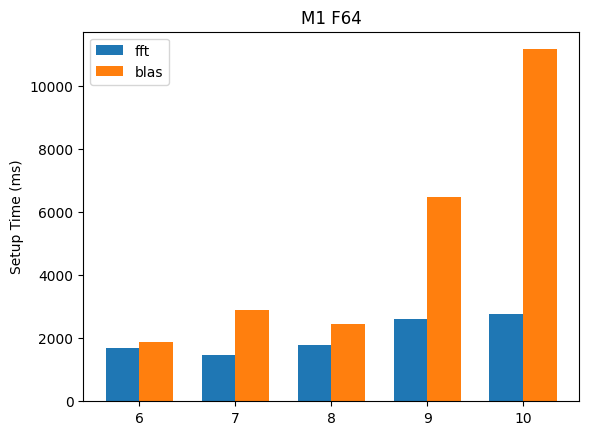

In [91]:
fig, ax = plt.subplots()

digits = np.array([6, 7, 8, 9, 10])

ax.set_title('M1 F64')
ax.set_ylabel('Setup Time (ms)')

bar_width = 0.35  # width of bars

ax.bar(digits-bar_width/2, [df['setup_time'] for df in best_fft_f64], bar_width, label='fft')
ax.bar(digits+bar_width/2, [df['setup_time'] for df in best_blas_f64], bar_width, label='blas')

ax.legend()